In [2]:
%pylab inline
!pip install JSAnimation
import math

Populating the interactive namespace from numpy and matplotlib
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11424 sha256=3e0e97aa17155151d0327e00dab75c52a023b90e68217587575fe239d6754350
  Stored in directory: /root/.cache/pip/wheels/0e/4e/3d/05fb8cca2646ee0bbfbce17c40a970f48d5e0698b9e5aaa91f
Successfully built JSAnimation


In [17]:
def sense(x):
    return x

def simulate(Δt, x, u, w):
    x += Δt * u + Δt * w
    return x

def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = 5 * sin(5*t) * sin(t) - (cos(5*t)+2) * cos(t)
    uy = - 5 * sin(5*t) * cos(t) - (cos(5*t)+2) * sin(t)
    return array([ux, uy])

def PI_control(t, y, ki):
    ux = 5 * sin(5*t) * sin(t) - (cos(5*t)+2) * cos(t)
    uy = - 5 * sin(5*t) * cos(t) - (cos(5*t)+2) * sin(t)
    xd = - (cos(5*t)+2) * sin(t)
    yd = (cos(5*t)+2) * cos(t)
    u = array([ux, uy]) + ki * t * (array([xd, yd]) - y)
    return u


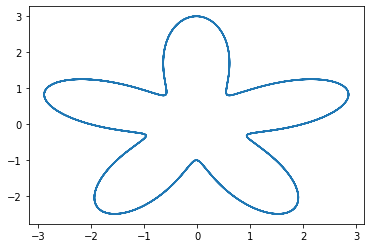

In [14]:
tf = 30.
Δt = 0.01
time = linspace(0., tf, int(tf / Δt) + 1)

x = array([0., 3.])
w = array([0., 0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u, w)
    x_log.append(copy(x))

x_log = array(x_log)

##grid()
plot(x_log[:,0], x_log[:,1])

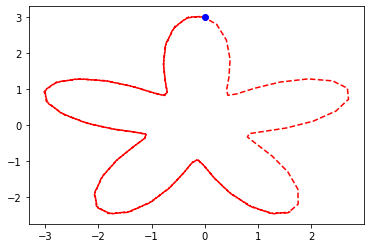

In [8]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

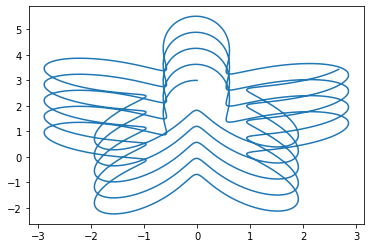

In [15]:
tf = 30.
Δt = 0.01
time = linspace(0., tf, int(tf / Δt) + 1)

x = array([0., 3.])
w = array([0., 0.1])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u, w)
    x_log.append(copy(x))

x_log = array(x_log)

##grid()
plot(x_log[:,0], x_log[:,1])

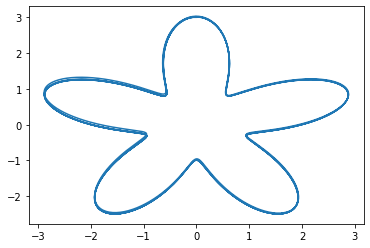

In [18]:
tf = 30.
Δt = 0.01
time = linspace(0., tf, int(tf / Δt) + 1)

x = array([0., 3.])
w = array([0., 0.1])
ki = 1
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = PI_control(t, y, ki)
    x = simulate(Δt, x, u, w)
    x_log.append(copy(x))

x_log = array(x_log)

##grid()
plot(x_log[:,0], x_log[:,1])